In [65]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
from hexagon_utilities import *
from colors import *
from plot_functions import *

import matplotlib.pyplot as plt



## V inside is this idea of drawing a smaller Triangle inside each CTRIANGE in a Hexagon

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

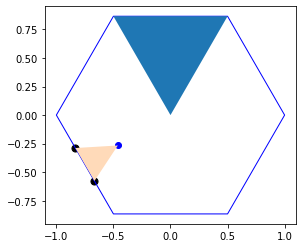

In [51]:
h = Hex(0,0, 1)
h.render(fc='none', color='b')

#now let's draw one CTRIANGE
h.decorate(poly=CTRIANGLE1)
index=3

xys = h.point('edge', action='trisect', index=index) 
for p in xys:
    plt.scatter(*p, color='k', s=50)

#Still need to find the 3rd point.
# It is on apothem with index 1
#dist from center is h/2 - triseg (which is size/3)index=1

p3 = h.point('apothem', dist=h.h/2 - h.size/3, index=index) 
for p in p3:
    plt.scatter(*p, c='b')

h.render_polygon(pt_list=xys+p3, fc=BROWNS[0])
    
    
plt.axis('scaled')

# Now, let's draw all 6 VV's in one go

(-1.1, 1.1, -0.9526279441628827, 0.9526279441628827)

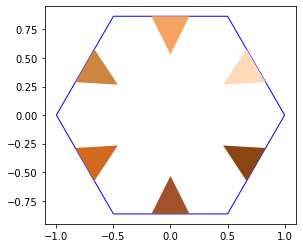

In [57]:
h = Hex(0,0, 1)
h.render(fc='none', color='b')

edge_trisegs = h.point('edge', action='trisect') 
#Still need to find the 3rd point for each V
# It is on the 6 apothems
#dist from center is h/2 - triseg (which is size/3)
p3_6 = h.point('apothem', dist=h.h/2 - h.size/3) 

for vv in range(6):
    pt_list = []
    pt_list.extend([edge_trisegs[vv], edge_trisegs[vv+6], p3_6[vv]])
    h.render_polygon(pt_list=pt_list, fc=BROWNS[vv])
    
    
plt.axis('scaled')

In [60]:
def valid_length(_list, number):
    #check that number is an integer
    
    #check that _list is list-like
    
    return (1 if len(_list) == number else 0)

In [63]:
valid_length([1,2,3], "aa")

0

In [68]:
BROWNS[:6]

['peachpuff', 'sandybrown', 'peru', 'chocolate', 'sienna', 'saddlebrown']

(-1.1, 1.1, -0.9526279441628824, 0.9526279441628825)

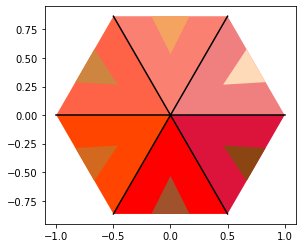

In [82]:
h = Hex(0,0, 1)


def hex_cookie_cutter(h, small_v_colors, big_v_colors, spoke_colors=None):
    #h.render(fc='none', color='b')

    edge_trisegs = h.point('edge', action='trisect') 
    p3_6 = h.point('apothem', dist=h.h/2 - h.size/3) 
    for vv in range(6):
        pt_list = []
        pt_list.extend([edge_trisegs[vv], edge_trisegs[vv+6], p3_6[vv]])
        h.decorate(poly=CTRIANGLES[vv], fc=big_v_colors[vv])
        h.render_polygon(pt_list=pt_list, fc=small_v_colors[vv])
    
    if spoke_colors:
        h.render_spokes(color=spoke_colors)

        
        
        
hex_cookie_cutter(h, BROWNS[:6], REDS[:6], 'black')    
plt.axis('scaled')

In [36]:
len(xys)

12

(-54.1, 80.1, -41.74242446240994, 38.27832284727219)

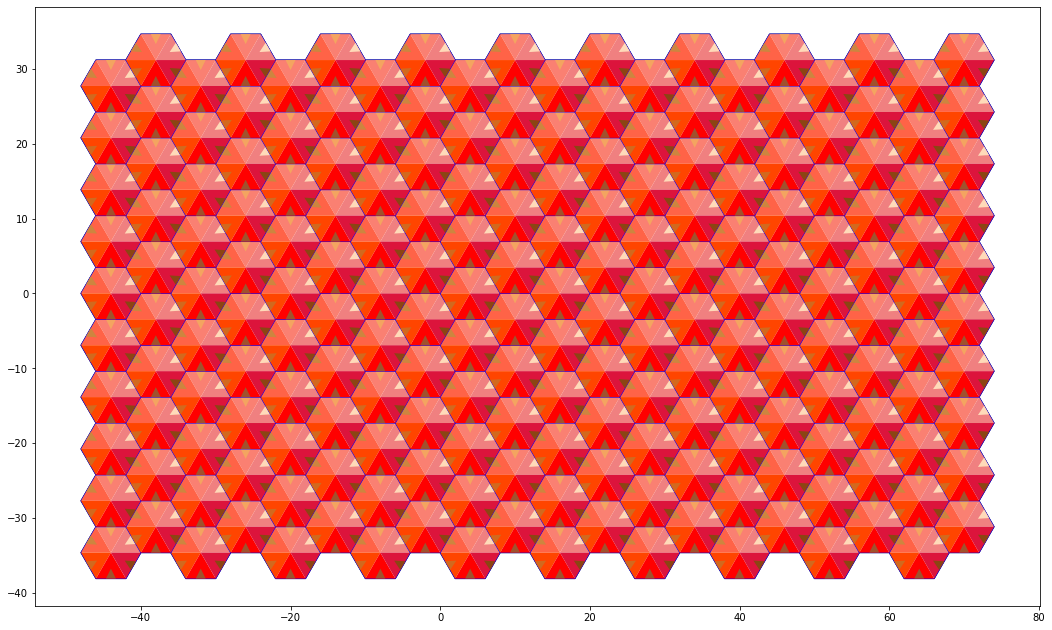

In [70]:
size=4
num_rows, num_cols = 20, 10
fig, ax = plt.subplots(figsize=(18,12))

hg = HexGrid(num_rows, num_cols, size, flat=True)
hg.render_grid(fc='none', color='k')    

for h in hg.hlist:
    hex_cookie_cutter(h, BROWNS[:6], REDS[:6])    

plt.axis('scaled')

In [186]:


cf = get_n_random_color_families(7)


            

logging.info(print_color_family_names(cf))
                 

['Oranges']
['red_browns']
['browns']
['Pinks']
['Oranges']
['Reds']
['black_whites']


['Greens']
['Yellows']


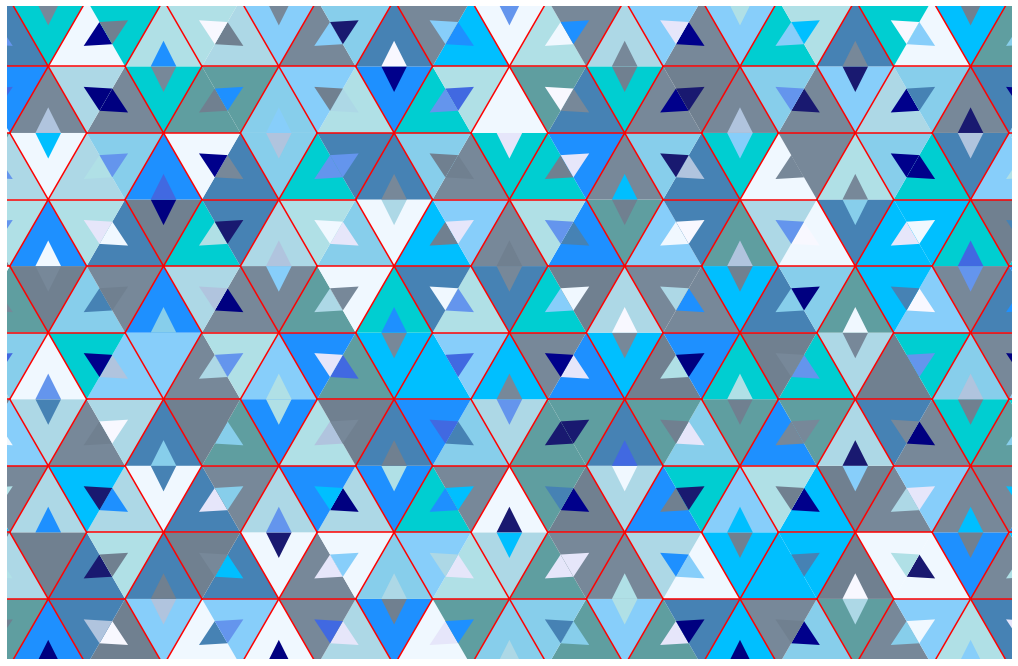

In [187]:
def main():
    
    logging.basicConfig(filename='hexagon_designs.log',level=logging.INFO)    


    fig, ax = plt.subplots(figsize=(18,12))

    bg_color = np.random.choice(YELLOWS_HIGH_SAT)
    bg_color = 'white'
    fc_bg = bg_color
    fig.patch.set_facecolor(fc_bg)

    size=2
    num_rows, num_cols = 14, 8
    hg = HexGrid(num_rows, num_cols, size, flat=True)


    #small_v_colors = ['white'] * 6
    # small_v_colors = ['white', 'Gray'] * 3   
    # big_v_colors = ['blue'] * 6

    n=2
    two_fams = get_n_random_color_families(n)
    logging.info(f'{n} color families chosen')
    logging.info(print_color_family_names(two_fams))
#    logging.info(print_color_family_names(f12))
    

#    f21, f22 = get_n_random_color_families(n)
#    logging.info(f'{n} color families chosen')
#    logging.info(f'{f21}, {f22}')
    

#    set11, set12 = [], []
#    set21, set22 = [], []
#    for color in range(6):
#        set11.append(get_rnd_color_from_family(f11))
#        set12.append(get_rnd_color_from_family(f12))
#        set21.append(get_rnd_color_from_family(f21))
#        set22.append(get_rnd_color_from_family(f22))
#        small_v_colors = rng.choice([set11])
#        big_v_colors = rng.choice([set12])
    
    rndst = 98
    rng = np.random.default_rng()    
    for h in hg.hlist:
        small_v_colors = get_random_color(6, low=100, high=120)
        big_v_colors = get_random_color(6, low=rndst, high=rndst+13)
        
        hex_cookie_cutter(h, small_v_colors, big_v_colors, spoke_colors='red')    

        
    plt.axis('equal')
    #ax.axis('scaled')
    xclip, yclip = 0.8, 0.7
    y_range = size * 1.732 * num_rows / 4 * yclip
    x_range = size * num_cols * xclip
    ax.set_ybound(lower=-1*y_range, upper=y_range)
    ax.set_xbound(lower=-1*x_range, upper=x_range)
    plt.axis('off')
    save_file(fig, 
              f'Nb16_VV_totallyRND colors',
              num_rows=num_rows, 
              num_cols=num_cols
             )

    
    logging.info('Finished')

if __name__ == '__main__':
    main()
